Missing Values:
 AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64
Number of outliers: AGE    0
SEX    0
BMI    3
BP     0
S1     8
S2     7
S3     7
S4     2
S5     4
S6     9
Y      0
dtype: int64
Total number of outliers across all columns: 40
Outliers detected in each column:
        AGE    SEX    BMI     BP     S1     S2     S3     S4     S5     S6  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
437  False  False  False  False  False  False  False  False  False  False   
438  False  False  False  False  False  

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


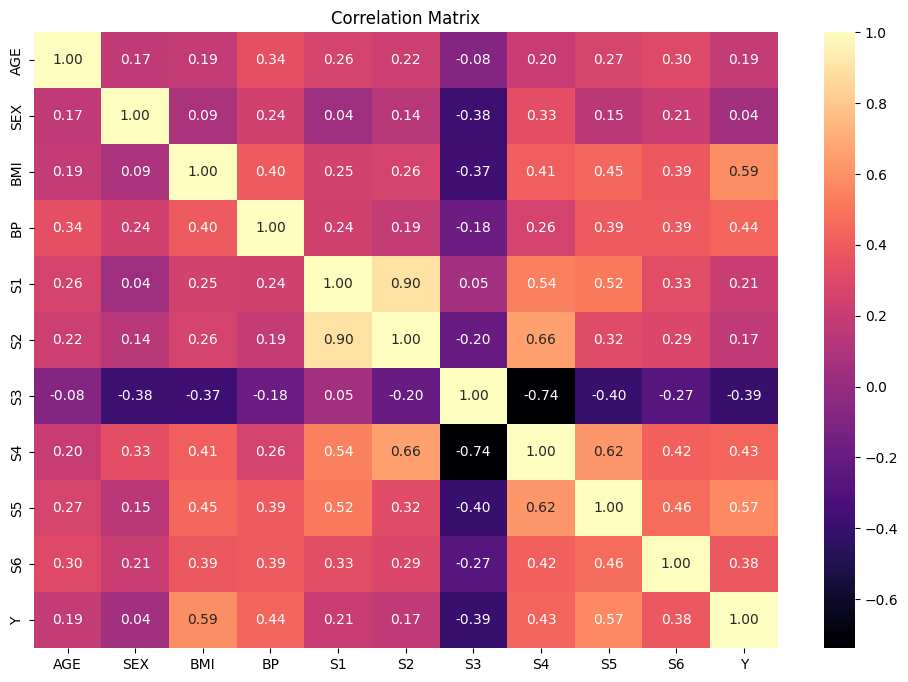

Feature Importance:
     Coefficient
S5     67.108962
S4     10.159539
BMI     5.846363
BP      1.197093
S2      0.811152
S3      0.601653
S6      0.201599
AGE     0.137688
S1     -1.281685
SEX   -23.064468
Limitations/Issues:
- Potential outliers could skew the model's performance.
- Limited context on the domain and interpretation of the features.
- The dataset may not cover all relevant factors affecting the target variable.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = """
AGE	SEX	BMI	BP	S1	S2	S3	S4	S5	S6	Y
59	2	32.1	101	157	93.2	38	4	4.8598	87	151
48	1	21.6	87	183	103.2	70	3	3.8918	69	75
72	2	30.5	93	156	93.6	41	4	4.6728	85	141
24	1	25.3	84	198	131.4	40	5	4.8903	89	206
50	1	23	101	192	125.4	52	4	4.2905	80	135
23	1	22.6	89	139	64.8	61	2	4.1897	68	97
36	2	22	90	160	99.6	50	3	3.9512	82	138
66	2	26.2	114	255	185	56	4.55	4.2485	92	63
60	2	32.1	83	179	119.4	42	4	4.4773	94	110
29	1	30	85	180	93.4	43	4	5.3845	88	310
22	1	18.6	97	114	57.6	46	2	3.9512	83	101
56	2	28	85	184	144.8	32	6	3.5835	77	69
53	1	23.7	92	186	109.2	62	3	4.3041	81	179
50	2	26.2	97	186	105.4	49	4	5.0626	88	185
61	1	24	91	202	115.4	72	3	4.2905	73	118
34	2	24.7	118	254	184.2	39	7	5.037	81	171
47	1	30.3	109	207	100.2	70	3	5.2149	98	166
68	2	27.5	111	214	147	39	5	4.9416	91	144
38	1	25.4	84	162	103	42	4	4.4427	87	97
41	1	24.7	83	187	108.2	60	3	4.5433	78	168
35	1	21.1	82	156	87.8	50	3	4.5109	95	68
25	2	24.3	95	162	98.6	54	3	3.8501	87	49
25	1	26	92	187	120.4	56	3	3.9703	88	68
61	2	32	103.67	210	85.2	35	6	6.107	124	245
31	1	29.7	88	167	103.4	48	4	4.3567	78	184
30	2	25.2	83	178	118.4	34	5	4.852	83	202
19	1	19.2	87	124	54	57	2	4.1744	90	137
42	1	31.9	83	158	87.6	53	3	4.4659	101	85
63	1	24.4	73	160	91.4	48	3	4.6347	78	131
67	2	25.8	113	158	54.2	64	2	5.2933	104	283
32	1	30.5	89	182	110.6	56	3	4.3438	89	129
42	1	20.3	71	161	81.2	66	2	4.2341	81	59
58	2	38	103	150	107.2	22	7	4.6444	98	341
57	1	21.7	94	157	58	82	2	4.4427	92	87
53	1	20.5	78	147	84.2	52	3	3.989	75	65
62	2	23.5	80.33	225	112.8	86	2.62	4.8752	96	102
52	1	28.5	110	195	97.2	60	3	5.2417	85	265
46	1	27.4	78	171	88	58	3	4.8283	90	276
48	2	33	123	253	163.6	44	6	5.425	97	252
48	2	27.7	73	191	119.4	46	4	4.852	92	90
50	2	25.6	101	229	162.2	43	5	4.7791	114	100
21	1	20.1	63	135	69	54	3	4.0943	89	55
32	2	25.4	90.33	153	100.4	34	4.5	4.5326	83	61
54	1	24.2	74	204	109	82	2	4.1744	109	92
61	2	32.7	97	177	118.4	29	6	4.9972	87	259
56	2	23.1	104	181	116.4	47	4	4.4773	79	53
33	1	25.3	85	155	85	51	3	4.5539	70	190
27	1	19.6	78	128	68	43	3	4.4427	71	142
67	2	22.5	98	191	119.2	61	3	3.989	86	75
37	2	27.7	93	180	119.4	30	6	5.0304	88	142
58	1	25.7	99	157	91.6	49	3	4.4067	93	155
65	2	27.9	103	159	96.8	42	4	4.6151	86	225
34	1	25.5	93	218	144	57	4	4.4427	88	59
46	1	24.9	115	198	129.6	54	4	4.2767	103	104
35	1	28.7	97	204	126.8	64	3	4.1897	93	182
37	1	21.8	84	184	101	73	3	3.912	93	128
37	1	30.2	87	166	96	40	4.15	5.0106	87	52
41	1	20.5	80	124	48.8	64	2	4.0254	75	37
60	1	20.4	105	198	78.4	99	2	4.6347	79	170
66	2	24	98	236	146.4	58	4	5.0626	96	170
29	1	26	83	141	65.2	64	2	4.0775	83	61
37	2	26.8	79	157	98	28	6	5.0434	96	144
41	2	25.7	83	181	106.6	66	3	3.7377	85	52
39	1	22.9	77	204	143.2	46	4	4.3041	74	128
67	2	24	83	143	77.2	49	3	4.4308	94	71
36	2	24.1	112	193	125	35	6	5.1059	95	163
46	2	24.7	85	174	123.2	30	6	4.6444	96	150
60	2	25	89.67	185	120.8	46	4.02	4.5109	92	97
59	2	23.6	83	165	100	47	4	4.4998	92	160
53	1	22.1	93	134	76.2	46	3	4.0775	96	178
48	1	19.9	91	189	109.6	69	3	3.9512	101	48
48	1	29.5	131	207	132.2	47	4	4.9345	106	270
66	2	26	91	264	146.6	65	4	5.5683	87	202
52	2	24.5	94	217	149.4	48	5	4.585	89	111
52	2	26.6	111	209	126.4	61	3	4.6821	109	85
46	2	23.5	87	181	114.8	44	4	4.7095	98	42
40	2	29	115	97	47.2	35	2.77	4.3041	95	170
22	1	23	73	161	97.8	54	3	3.8286	91	200
50	1	21	88	140	71.8	35	4	5.112	71	252
20	1	22.9	87	191	128.2	53	4	3.8918	85	113
68	1	27.5	107	241	149.6	64	4	4.92	90	143
52	2	24.3	86	197	133.6	44	5	4.5747	91	51
44	1	23.1	87	213	126.4	77	3	3.8712	72	52
38	1	27.3	81	146	81.6	47	3	4.4659	81	210
49	1	22.7	65.33	168	96.2	62	2.71	3.8918	60	65
61	1	33	95	182	114.8	54	3	4.1897	74	141
29	2	19.4	83	152	105.8	39	4	3.5835	83	55
61	1	25.8	98	235	125.8	76	3	5.112	82	134
34	2	22.6	75	166	91.8	60	3	4.2627	108	42
36	1	21.9	89	189	105.2	68	3	4.3694	96	111
52	1	24	83	167	86.6	71	2	3.8501	94	98
61	1	31.2	79	235	156.8	47	5	5.0499	96	164
43	1	26.8	123	193	102.2	67	3	4.7791	94	48
35	1	20.4	65	187	105.6	67	2.79	4.2767	78	96
27	1	24.8	91	189	106.8	69	3	4.1897	69	90
29	1	21	71	156	97	38	4	4.654	90	162
64	2	27.3	109	186	107.6	38	5	5.3083	99	150
41	1	34.6	87.33	205	142.6	41	5	4.6728	110	279
49	2	25.9	91	178	106.6	52	3	4.5747	75	92
48	1	20.4	98	209	139.4	46	5	4.7707	78	83
53	1	28	88	233	143.8	58	4	5.0499	91	128
53	2	22.2	113	197	115.2	67	3	4.3041	100	102
23	1	29	90	216	131.4	65	3	4.585	91	302
65	2	30.2	98	219	160.6	40	5	4.5218	84	198
41	1	32.4	94	171	104.4	56	3	3.9703	76	95
55	2	23.4	83	166	101.6	46	4	4.5218	96	53
22	1	19.3	82	156	93.2	52	3	3.989	71	134
56	1	31	78.67	187	141.4	34	5.5	4.0604	90	144
54	2	30.6	103.33	144	79.8	30	4.8	5.1417	101	232
59	2	25.5	95.33	190	139.4	35	5.43	4.3567	117	81
60	2	23.4	88	153	89.8	58	3	3.2581	95	104
54	1	26.8	87	206	122	68	3	4.382	80	59
25	1	28.3	87	193	128	49	4	4.382	92	246
54	2	27.7	113	200	128.4	37	5	5.1533	113	297
55	1	36.6	113	199	94.4	43	4.63	5.7301	97	258
40	2	26.5	93	236	147	37	7	5.5607	92	229
62	2	31.8	115	199	128.6	44	5	4.8828	98	275
65	1	24.4	120	222	135.6	37	6	5.5094	124	281
33	2	25.4	102	206	141	39	5	4.8675	105	179
53	1	22	94	175	88	59	3	4.9416	98	200
35	1	26.8	98	162	103.6	45	4	4.2047	86	200
66	1	28	101	195	129.2	40	5	4.8598	94	173
62	2	33.9	101	221	156.4	35	6	4.9972	103	180
50	2	29.6	94.33	300	242.4	33	9.09	4.8122	109	84
47	1	28.6	97	164	90.6	56	3	4.4659	88	121
47	2	25.6	94	165	74.8	40	4	5.5255	93	161
24	1	20.7	87	149	80.6	61	2	3.6109	78	99
58	2	26.2	91	217	124.2	71	3	4.6913	68	109
34	1	20.6	87	185	112.2	58	3	4.3041	74	115
51	1	27.9	96	196	122.2	42	5	5.0689	120	268
31	2	35.3	125	187	112.4	48	4	4.8903	109	274
22	1	19.9	75	175	108.6	54	3	4.1271	72	158
53	2	24.4	92	214	146	50	4	4.4998	97	107
37	2	21.4	83	128	69.6	49	3	3.8501	84	83
28	1	30.4	85	198	115.6	67	3	4.3438	80	103
47	1	31.6	84	154	88	30	5.1	5.1985	105	272
23	1	18.8	78	145	72	63	2	3.912	86	85
50	1	31	123	178	105	48	4	4.8283	88	280
58	2	36.7	117	166	93.8	44	4	4.9488	109	336
55	1	32.1	110	164	84.2	42	4	5.2417	90	281
60	2	27.7	107	167	114.6	38	4	4.2767	95	118
41	1	30.8	81	214	152	28	7.6	5.1358	123	317
60	2	27.5	106	229	143.8	51	4	5.1417	91	235
40	1	26.9	92	203	119.8	70	3	4.1897	81	60
57	2	30.7	90	204	147.8	34	6	4.7095	93	174
37	1	38.3	113	165	94.6	53	3	4.4659	79	259
40	2	31.9	95	198	135.6	38	5	4.804	93	178
33	1	35	89	200	130.4	42	4.76	4.9273	101	128
32	2	27.8	89	216	146.2	55	4	4.3041	91	96
35	2	25.9	81	174	102.4	31	6	5.3132	82	126
55	1	32.9	102	164	106.2	41	4	4.4308	89	288
49	1	26	93	183	100.2	64	3	4.5433	88	88
39	2	26.3	115	218	158.2	32	7	4.9345	109	292
60	2	22.3	113	186	125.8	46	4	4.2627	94	71
67	2	28.3	93	204	132.2	49	4	4.7362	92	197
41	2	32	109	251	170.6	49	5	5.0562	103	186
44	1	25.4	95	162	92.6	53	3	4.4067	83	25
48	2	23.3	89.33	212	142.8	46	4.61	4.7536	98	84
45	1	20.3	74.33	190	126.2	49	3.88	4.3041	79	96
47	1	30.4	120	199	120	46	4	5.1059	87	195
46	1	20.6	73	172	107	51	3	4.2485	80	53
36	2	32.3	115	286	199.4	39	7	5.4723	112	217
34	1	29.2	73	172	108.2	49	4	4.3041	91	172
53	2	33.1	117	183	119	48	4	4.382	106	131
61	1	24.6	101	209	106.8	77	3	4.8363	88	214
37	1	20.2	81	162	87.8	63	3	4.0254	88	59
33	2	20.8	84	125	70.2	46	3	3.7842	66	70
68	1	32.8	105.67	205	116.4	40	5.13	5.4931	117	220
49	2	31.9	94	234	155.8	34	7	5.3982	122	268
48	1	23.9	109	232	105.2	37	6	6.107	96	152
55	2	24.5	84	179	105.8	66	3	3.5835	87	47
43	1	22.1	66	134	77.2	45	3	4.0775	80	74
60	2	33	97	217	125.6	45	5	5.4467	112	295
31	2	19	93	137	73	47	3	4.4427	78	101
53	2	27.3	82	119	55	39	3	4.8283	93	151
67	1	22.8	87	166	98.6	52	3	4.3438	92	127
61	2	28.2	106	204	132	52	4	4.6052	96	237
62	1	28.9	87.33	206	127.2	33	6.24	5.4337	99	225
60	1	25.6	87	207	125.8	69	3	4.1109	84	81
42	1	24.9	91	204	141.8	38	5	4.7958	89	151
38	2	26.8	105	181	119.2	37	5	4.8203	91	107
62	1	22.4	79	222	147.4	59	4	4.3567	76	64
61	2	26.9	111	236	172.4	39	6	4.8122	89	138
61	2	23.1	113	186	114.4	47	4	4.8122	105	185
53	1	28.6	88	171	98.8	41	4	5.0499	99	265
28	2	24.7	97	175	99.6	32	5	5.3799	87	101
26	2	30.3	89	218	152.2	31	7	5.1591	82	137
30	1	21.3	87	134	63	63	2	3.6889	66	143
50	1	26.1	109	243	160.6	62	4	4.625	89	141
48	1	20.2	95	187	117.4	53	4	4.4188	85	79
51	1	25.2	103	176	112.2	37	5	4.8978	90	292
47	2	22.5	82	131	66.8	41	3	4.7536	89	178
64	2	23.5	97	203	129	59	3	4.3175	77	91
51	2	25.9	76	240	169	39	6	5.0752	96	116
30	1	20.9	104	152	83.8	47	3	4.6634	97	86
56	2	28.7	99	208	146.4	39	5	4.7274	97	122
42	1	22.1	85	213	138.6	60	4	4.2767	94	72
62	2	26.7	115	183	124	35	5	4.7875	100	129
34	1	31.4	87	149	93.8	46	3	3.8286	77	142
60	1	22.2	104.67	221	105.4	60	3.68	5.6276	93	90
64	1	21	92.33	227	146.8	65	3.49	4.3307	102	158
39	2	21.2	90	182	110.4	60	3	4.0604	98	39
71	2	26.5	105	281	173.6	55	5	5.5683	84	196
48	2	29.2	110	218	151.6	39	6	4.92	98	222
79	2	27	103	169	110.8	37	5	4.6634	110	277
40	1	30.7	99	177	85.4	50	4	5.3375	85	99
49	2	28.8	92	207	140	44	5	4.7449	92	196
51	1	30.6	103	198	106.6	57	3	5.1475	100	202
57	1	30.1	117	202	139.6	42	5	4.625	120	155
59	2	24.7	114	152	104.8	29	5	4.5109	88	77
51	1	27.7	99	229	145.6	69	3	4.2767	77	191
74	1	29.8	101	171	104.8	50	3	4.3944	86	70
67	1	26.7	105	225	135.4	69	3	4.6347	96	73
49	1	19.8	88	188	114.8	57	3	4.3944	93	49
57	1	23.3	88	155	63.6	78	2	4.2047	78	65
56	2	35.1	123	164	95	38	4	5.0434	117	263
52	2	29.7	109	228	162.8	31	8	5.1417	103	248
69	1	29.3	124	223	139	54	4	5.0106	102	296
37	1	20.3	83	185	124.6	38	5	4.7185	88	214
24	1	22.5	89	141	68	52	3	4.654	84	185
55	2	22.7	93	154	94.2	53	3	3.5264	75	78
36	1	22.8	87	178	116	41	4	4.654	82	93
42	2	24	107	150	85	44	3	4.654	96	252
21	1	24.2	76	147	77	53	3	4.4427	79	150
41	1	20.2	62	153	89	50	3	4.2485	89	77
57	2	29.4	109	160	87.6	31	5	5.3327	92	208
20	2	22.1	87	171	99.6	58	3	4.2047	78	77
67	2	23.6	111.33	189	105.4	70	2.7	4.2195	93	108
34	1	25.2	77	189	120.6	53	4	4.3438	79	160
41	2	24.9	86	192	115	61	3	4.382	94	53
38	2	33	78	301	215	50	6.02	5.193	108	220
51	1	23.5	101	195	121	51	4	4.7449	94	154
52	2	26.4	91.33	218	152	39	5.59	4.9053	99	259
67	1	29.8	80	172	93.4	63	3	4.3567	82	90
61	1	30	108	194	100	52	3.73	5.3471	105	246
67	2	25	111.67	146	93.4	33	4.42	4.585	103	124
56	1	27	105	247	160.6	54	5	5.0876	94	67
64	1	20	74.67	189	114.8	62	3.05	4.1109	91	72
58	2	25.5	112	163	110.6	29	6	4.7622	86	257
55	1	28.2	91	250	140.2	67	4	5.366	103	262
62	2	33.3	114	182	114	38	5	5.0106	96	275
57	2	25.6	96	200	133	52	3.85	4.3175	105	177
20	2	24.2	88	126	72.2	45	3	3.7842	74	71
53	2	22.1	98	165	105.2	47	4	4.1589	81	47
32	2	31.4	89	153	84.2	56	3	4.1589	90	187
41	1	23.1	86	148	78	58	3	4.0943	60	125
60	1	23.4	76.67	247	148	65	3.8	5.1358	77	78
26	1	18.8	83	191	103.6	69	3	4.5218	69	51
37	1	30.8	112	282	197.2	43	7	5.3423	101	258
45	1	32	110	224	134.2	45	5	5.4116	93	215
67	1	31.6	116	179	90.4	41	4	5.4723	100	303
34	2	35.5	120	233	146.6	34	7	5.5683	101	243
50	1	31.9	78.33	207	149.2	38	5.45	4.5951	84	91
71	1	29.5	97	227	151.6	45	5	5.0239	108	150
57	2	31.6	117	225	107.6	40	6	5.9584	113	310
49	1	20.3	93	184	103	61	3	4.6052	93	153
35	1	41.3	81	168	102.8	37	5	4.9488	94	346
41	2	21.2	102	184	100.4	64	3	4.585	79	63
70	2	24.1	82.33	194	149.2	31	6.26	4.2341	105	89
52	1	23	107	179	123.7	42.5	4.21	4.1589	93	50
60	1	25.6	78	195	95.4	91	2	3.7612	87	39
62	1	22.5	125	215	99	98	2	4.4998	95	103
44	2	38.2	123	201	126.6	44	5	5.0239	92	308
28	2	19.2	81	155	94.6	51	3	3.8501	87	116
58	2	29	85	156	109.2	36	4	3.989	86	145
39	2	24	89.67	190	113.6	52	3.65	4.804	101	74
34	2	20.6	98	183	92	83	2	3.6889	92	45
65	1	26.3	70	244	166.2	51	5	4.8978	98	115
66	2	34.6	115	204	139.4	36	6	4.9628	109	264
51	1	23.4	87	220	108.8	93	2	4.5109	82	87
50	2	29.2	119	162	85.2	54	3	4.7362	95	202
59	2	27.2	107	158	102	39	4	4.4427	93	127
52	1	27	78.33	134	73	44	3.05	4.4427	69	182
69	2	24.5	108	243	136.4	40	6	5.8081	100	241
53	1	24.1	105	184	113.4	46	4	4.8122	95	66
47	2	25.3	98	173	105.6	44	4	4.7622	108	94
52	1	28.8	113	280	174	67	4	5.273	86	283
39	1	20.9	95	150	65.6	68	2	4.4067	95	64
67	2	23	70	184	128	35	5	4.654	99	102
59	2	24.1	96	170	98.6	54	3	4.4659	85	200
51	2	28.1	106	202	122.2	55	4	4.8203	87	265
23	2	18	78	171	96	48	4	4.9053	92	94
68	1	25.9	93	253	181.2	53	5	4.5433	98	230
44	1	21.5	85	157	92.2	55	3	3.8918	84	181
60	2	24.3	103	141	86.6	33	4	4.6728	78	156
52	1	24.5	90	198	129	29	7	5.2983	86	233
38	1	21.3	72	165	60.2	88	2	4.4308	90	60
61	1	25.8	90	280	195.4	55	5	4.9972	90	219
68	2	24.8	101	221	151.4	60	4	3.8712	87	80
28	2	31.5	83	228	149.4	38	6	5.3132	83	68
65	2	33.5	102	190	126.2	35	5	4.9698	102	332
69	1	28.1	113	234	142.8	52	4	5.2781	77	248
51	1	24.3	85.33	153	71.6	71	2.15	3.9512	82	84
29	1	35	98.33	204	142.6	50	4.08	4.0431	91	200
55	2	23.5	93	177	126.8	41	4	3.8286	83	55
34	2	30	83	185	107.2	53	3	4.8203	92	85
67	1	20.7	83	170	99.8	59	3	4.0254	77	89
49	1	25.6	76	161	99.8	51	3	3.9318	78	31
55	2	22.9	81	123	67.2	41	3	4.3041	88	129
59	2	25.1	90	163	101.4	46	4	4.3567	91	83
53	1	33.2	82.67	186	106.8	46	4.04	5.112	102	275
48	2	24.1	110	209	134.6	58	4	4.4067	100	65
52	1	29.5	104.33	211	132.8	49	4.31	4.9836	98	198
69	1	29.6	122	231	128.4	56	4	5.451	86	236
60	2	22.8	110	245	189.8	39	6	4.3944	88	253
46	2	22.7	83	183	125.8	32	6	4.8363	75	124
51	2	26.2	101	161	99.6	48	3	4.2047	88	44
67	2	23.5	96	207	138.2	42	5	4.8978	111	172
49	1	22.1	85	136	63.4	62	2.19	3.9703	72	114
46	2	26.5	94	247	160.2	59	4	4.9345	111	142
47	1	32.4	105	188	125	46	4.09	4.4427	99	109
75	1	30.1	78	222	154.2	44	5.05	4.7791	97	180
28	1	24.2	93	174	106.4	54	3	4.2195	84	144
65	2	31.3	110	213	128	47	5	5.247	91	163
42	1	30.1	91	182	114.8	49	4	4.5109	82	147
51	1	24.5	79	212	128.6	65	3	4.5218	91	97
53	2	27.7	95	190	101.8	41	5	5.4638	101	220
54	1	23.2	110.67	238	162.8	48	4.96	4.9127	108	190
73	1	27	102	211	121	67	3	4.7449	99	109
54	1	26.8	108	176	80.6	67	3	4.9558	106	191
42	1	29.2	93	249	174.2	45	6	5.0039	92	122
75	1	31.2	117.67	229	138.8	29	7.9	5.7236	106	230
55	2	32.1	112.67	207	92.4	25	8.28	6.1048	111	242
68	2	25.7	109	233	112.6	35	7	6.0568	105	248
57	1	26.9	98	246	165.2	38	7	5.366	96	249
48	1	31.4	75.33	242	151.6	38	6.37	5.5683	103	192
61	2	25.6	85	184	116.2	39	5	4.9698	98	131
69	1	37	103	207	131.4	55	4	4.6347	90	237
38	1	32.6	77	168	100.6	47	4	4.625	96	78
45	2	21.2	94	169	96.8	55	3	4.4543	102	135
51	2	29.2	107	187	139	32	6	4.382	95	244
71	2	24	84	138	85.8	39	4	4.1897	90	199
57	1	36.1	117	181	108.2	34	5	5.2679	100	270
56	2	25.8	103	177	114.4	34	5	4.9628	99	164
32	2	22	88	137	78.6	48	3	3.9512	78	72
50	1	21.9	91	190	111.2	67	3	4.0775	77	96
43	1	34.3	84	256	172.6	33	8	5.5294	104	306
54	2	25.2	115	181	120	39	5	4.7005	92	91
31	1	23.3	85	190	130.8	43	4	4.3944	77	214
56	1	25.7	80	244	151.6	59	4	5.118	95	95
44	1	25.1	133	182	113	55	3	4.2485	84	216
57	2	31.9	111	173	116.2	41	4	4.3694	87	263
64	2	28.4	111	184	127	41	4	4.382	97	178
43	1	28.1	121	192	121	60	3	4.0073	93	113
19	1	25.3	83	225	156.6	46	5	4.7185	84	200
71	2	26.1	85	220	152.4	47	5	4.6347	91	139
50	2	28	104	282	196.8	44	6	5.3279	95	139
59	2	23.6	73	180	107.4	51	4	4.6821	84	88
57	1	24.5	93	186	96.6	71	3	4.5218	91	148
49	2	21	82	119	85.4	23	5	3.9703	74	88
41	2	32	126	198	104.2	49	4	5.4116	124	243
25	2	22.6	85	130	71	48	3	4.0073	81	71
52	2	19.7	81	152	53.4	82	2	4.4188	82	77
34	1	21.2	84	254	113.4	52	5	6.0936	92	109
42	2	30.6	101	269	172.2	50	5	5.4553	106	272
28	2	25.5	99	162	101.6	46	4	4.2767	94	60
47	2	23.3	90	195	125.8	54	4	4.3307	73	54
32	2	31	100	177	96.2	45	4	5.1874	77	221
43	1	18.5	87	163	93.6	61	2.67	3.7377	80	90
59	2	26.9	104	194	126.6	43	5	4.804	106	311
53	1	28.3	101	179	107	48	4	4.7875	101	281
60	1	25.7	103	158	84.6	64	2	3.8501	97	182
54	2	36.1	115	163	98.4	43	4	4.6821	101	321
35	2	24.1	94.67	155	97.4	32	4.84	4.852	94	58
49	2	25.8	89	182	118.6	39	5	4.804	115	262
58	1	22.8	91	196	118.8	48	4	4.9836	115	206
36	2	39.1	90	219	135.8	38	6	5.4205	103	233
46	2	42.2	99	211	137	44	5	5.0106	99	242
44	2	26.6	99	205	109	43	5	5.5797	111	123
46	1	29.9	83	171	113	38	4.5	4.585	98	167
54	1	21	78	188	107.4	70	3	3.9703	73	63
63	2	25.5	109	226	103.2	46	5	5.9506	87	197
41	2	24.2	90	199	123.6	57	4	4.5218	86	71
28	1	25.4	93	141	79	49	3	4.1744	91	168
19	1	23.2	75	143	70.4	52	3	4.6347	72	140
61	2	26.1	126	215	129.8	57	4	4.9488	96	217
48	1	32.7	93	276	198.6	43	6.42	5.1475	91	121
54	2	27.3	100	200	144	33	6	4.7449	76	235
53	2	26.6	93	185	122.4	36	5	4.8903	82	245
48	1	22.8	101	110	41.6	56	2	4.1271	97	40
53	1	28.8	111.67	145	87.2	46	3.15	4.0775	85	52
29	2	18.1	73	158	99	41	4	4.4998	78	104
62	1	32	88	172	69	38	4	5.7838	100	132
50	2	23.7	92	166	97	52	3	4.4427	93	88
58	2	23.6	96	257	171	59	4	4.9053	82	69
55	2	24.6	109	143	76.4	51	3	4.3567	88	219
54	1	22.6	90	183	104.2	64	3	4.3041	92	72
36	1	27.8	73	153	104.4	42	4	3.4965	73	201
63	2	24.1	111	184	112.2	44	4	4.9345	82	110
47	2	26.5	70	181	104.8	63	3	4.1897	70	51
51	2	32.8	112	202	100.6	37	5	5.7746	109	277
42	1	19.9	76	146	83.2	55	3	3.6636	79	63
37	2	23.6	94	205	138.8	53	4	4.1897	107	118
28	1	22.1	82	168	100.6	54	3	4.2047	86	69
58	1	28.1	111	198	80.6	31	6	6.0684	93	273
32	1	26.5	86	184	101.6	53	4	4.9904	78	258
25	2	23.5	88	143	80.8	55	3	3.5835	83	43
63	1	26	85.67	155	78.2	46	3.37	5.037	97	198
52	1	27.8	85	219	136	49	4	5.1358	75	242
65	2	28.5	109	201	123	46	4	5.0752	96	232
42	1	30.6	121	176	92.8	69	3	4.2627	89	175
53	1	22.2	78	164	81	70	2	4.1744	101	93
79	2	23.3	88	186	128.4	33	6	4.8122	102	168
43	1	35.4	93	185	100.2	44	4	5.3181	101	275
44	1	31.4	115	165	97.6	52	3	4.3438	89	293
62	2	37.8	119	113	51	31	4	5.0434	84	281
33	1	18.9	70	162	91.8	59	3	4.0254	58	72
56	1	35	79.33	195	140.8	42	4.64	4.1109	96	140
66	1	21.7	126	212	127.8	45	4.71	5.2781	101	189
34	2	25.3	111	230	162	39	6	4.9767	90	181
46	2	23.8	97	224	139.2	42	5	5.366	81	209
50	1	31.8	82	136	69.2	55	2	4.0775	85	136
69	1	34.3	113	200	123.8	54	4	4.7095	112	261
34	1	26.3	87	197	120	63	3	4.2485	96	113
71	2	27	93.33	269	190.2	41	6.56	5.2417	93	131
47	1	27.2	80	208	145.6	38	6	4.804	92	174
41	1	33.8	123.33	187	127	45	4.16	4.3175	100	257
34	1	33	73	178	114.6	51	3.49	4.1271	92	55
51	1	24.1	87	261	175.6	69	4	4.4067	93	84
43	1	21.3	79	141	78.8	53	3	3.8286	90	42
55	1	23	94.67	190	137.6	38	5	4.2767	106	146
59	2	27.9	101	218	144.2	38	6	5.1874	95	212
27	2	33.6	110	246	156.6	57	4	5.0876	89	233
51	2	22.7	103	217	162.4	30	7	4.8122	80	91
49	2	27.4	89	177	113	37	5	4.9053	97	111
27	1	22.6	71	116	43.4	56	2	4.4188	79	152
57	2	23.2	107.33	231	159.4	41	5.63	5.0304	112	120
39	2	26.9	93	136	75.4	48	3	4.1431	99	67
62	2	34.6	120	215	129.2	43	5	5.366	123	310
37	1	23.3	88	223	142	65	3.4	4.3567	82	94
46	1	21.1	80	205	144.4	42	5	4.5326	87	183
68	2	23.5	101	162	85.4	59	3	4.4773	91	66
51	1	31.5	93	231	144	49	4.7	5.2523	117	173
41	1	20.8	86	223	128.2	83	3	4.0775	89	72
53	1	26.5	97	193	122.4	58	3	4.1431	99	49
45	1	24.2	83	177	118.4	45	4	4.2195	82	64
33	1	19.5	80	171	85.4	75	2	3.9703	80	48
60	2	28.2	112	185	113.8	42	4	4.9836	93	178
47	2	24.9	75	225	166	42	5	4.4427	102	104
60	2	24.9	99.67	162	106.6	43	3.77	4.1271	95	132
36	1	30	95	201	125.2	42	4.79	5.1299	85	220
36	1	19.6	71	250	133.2	97	3	4.5951	92	57
"""

from io import StringIO
df = pd.read_csv(StringIO(data), sep="\t")
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3).any(axis=0)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outlier_sums = df.where(outliers).sum()
outlier_counts = outliers.sum()
total_outlier_count = outlier_counts.sum()
print(f"Number of outliers: {np.sum(outliers)}")
print(f"Total number of outliers across all columns: {total_outlier_count}")

print("Outliers detected in each column:\n", outliers)

df = df.apply(pd.to_numeric, errors='coerce')
print("Data types after transformation:\n", df.dtypes)
data_types = df.dtypes
print("Data Types:\n", data_types)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title("Correlation Matrix")
plt.show()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df.drop('Y', axis=1)
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
importance = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
importance = importance.sort_values(by="Coefficient", ascending=False)
print("Feature Importance:")
print(importance)
print("Limitations/Issues:")
print("- Potential outliers could skew the model's performance.")
print("- Limited context on the domain and interpretation of the features.")
print("- The dataset may not cover all relevant factors affecting the target variable.")
